In [1]:
######################################################################
# Modelling Sleep Duration Using Gaussian Processes
# LE49: MiniProject
# Jan Ondras (jo356), Trinity College
# 2017/2018
######################################################################
# Perform hierarchical clustering using PRODUCT kernel parameters
# For both variants: 5 params, or periodicity and Matern length-scale only
###########################################################
# Load user parameters from GP fitting
# & cluster, plot dendogram, 
# & save obtained labelling
###########################################################
# THIS IS FOR KERNEL TYPE 3: Matern*Periodic
###########################################################

import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime, timedelta

t = 'sleepduration' # type of data to extract
extra_type = '_3_x1264' 
# kernel type used and number of users (default 108)

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

X = [] # dataset for clustering
y = [] # associated labels = UIDs

# For each user
for file_name in glob.glob('./../Dataset/Params/clean_' + t + extra_type + '/*.npz'):
    UID = file_name.split('/')[-1][:-4]
    
    X.append(np.load(file_name)['params'])
    y.append(UID)

X = np.array(X)
y = np.array(y)

print "Clustering ", len(y), " users. Shape = ", X.shape 
print "Min: ", np.min(X, axis=0) #np.exp(np.min(X, axis=0))
print "Max: ", np.max(X, axis=0) #np.exp(np.max(X, axis=0))
print "Signal variance, Matern length scale, Length scale, Periodicity, White noise"

Clustering  1264  users. Shape =  (1264, 5)
Min:  [ 0.03658886  0.98538825  0.5         1.00405677  0.01      ]
Max:  [  20.61679014 1000.           27.38167728  334.873395     10.        ]
Signal variance, Matern length scale, Length scale, Periodicity, White noise


In [2]:
# OPTIONAL: Skip some columns in original feature matrix
# X = np.array( [ [np.log(row[0]), row[1], np.log(row[2]), row[3] ] for row in X] ) 
# X = np.array( [ [np.log(row[0]), row[1], row[2], row[3] ] for row in X] ) 
# X = np.array( [ [row[0], row[1], row[3] ] for row in X] ) 
# X = np.array( [ [ row[2] ] for row in X] )
# X = np.array( [ [row[0], row[1], row[3] ] for row in X] ) 
# X = np.array( [ [row[1], row[2], row[3] ] for row in X] ) 

# Keep Matern length scale,&, Periodicity
X = np.array( [ [row[1], row[3] ] for row in X] ) 

# Keep Matern length scale ONLY
# X = np.array( [ [row[1] ] for row in X] ) 

In [41]:
# ###########################################################################################################
# # OPTIONAL: Insert other info into clustering: mean sleepduration, OR mean sleepduration weekdays, mean sleepduration weekends
# # NOT NEEDED
# ##########################################################################################################
# from datetime import datetime, timedelta

# msds = [] # mean sleep durations for each UID
# msds_wd = [] # weekdays
# msds_we = [] # weekends 

# mbis = [] # mean bedin time for each UID
# mbis_wd = [] # weekdays
# mbis_we = [] # weekends 

# mbos = [] # mean bedout time for each UID
# mbos_wd = [] # weekdays
# mbos_we = [] # weekends 

# mscs = [] # mean step count for each UID
# mscs_wd = [] # weekdays
# mscs_we = [] # weekends 

# for UID in y: # iterate over UIDs

#     ################################ Sleepduration first
#     UID_data = np.load('./../Dataset/' + t + '/' + UID + '.npz')['xy'] # get x,y data
#     wd = []
#     we = []
#     for xxx,yyy in UID_data:
#         if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
#             we.append(yyy)
#         else:
#             wd.append(yyy)
#     msds.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
#     msds_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
#     msds_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
#     ################################ Bedin
#     UID_data = np.load('./../Dataset/bedin/' + UID + '.npz')['xy'] # get x,y data
#     wd = []
#     we = []
#     for xxx,yyy in UID_data:
#         if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
#             we.append(yyy)
#         else:
#             wd.append(yyy)
#     mbis.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
#     mbis_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
#     mbis_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
#     ################################ Bedout   
#     UID_data = np.load('./../Dataset/bedout/' + UID + '.npz')['xy'] # get x,y data
#     wd = []
#     we = []
#     for xxx,yyy in UID_data:
#         if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
#             we.append(yyy)
#         else:
#             wd.append(yyy)
#     mbos.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
#     mbos_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
#     mbos_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
#     ################################ Steps   
#     UID_data = np.load('./../Dataset/steps/' + UID + '.npz')['xy'] # get x,y data
#     wd = []
#     we = []
#     for xxx,yyy in UID_data:
#         if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
#             we.append(yyy)
#         else:
#             wd.append(yyy)
#     mscs.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
#     mscs_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
#     mscs_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
# # What to add ? 
# # X = np.array( [ [row[2]] for row in X] ) # Skip some columns in original feature matrix

# # X = np.concatenate((X, np.array(msds)), axis=1) # add msds
# # X = np.concatenate((X, np.array(msds_wd)), axis=1) # add msds weekdays
# # X = np.concatenate((X, np.array(msds_we)), axis=1) # add msds weekends

# # X = np.concatenate((X, np.array(mbis)), axis=1) # add msds
# # X = np.concatenate((X, np.array(mbis_wd)), axis=1) # add msds weekdays
# # X = np.concatenate((X, np.array(mbis_we)), axis=1) # add msds weekends

# # X = np.concatenate((X, np.array(mbos)), axis=1) # add msds
# # X = np.concatenate((X, np.array(mbos_wd)), axis=1) # add msds weekdays
# # X = np.concatenate((X, np.array(mbos_we)), axis=1) # add msds weekends

# # X = np.concatenate((X, np.array(mscs)), axis=1) # add msds
# # X = np.concatenate((X, np.array(mscs_wd)), axis=1) # add msds weekdays
# # X = np.concatenate((X, np.array(mscs_we)), axis=1) # add msds weekends

# print X[:3]
# print "Min: ", np.min(X, axis=0).tolist() #np.exp(np.min(X, axis=0))
# print "Max: ", np.max(X, axis=0).tolist() #np.exp(np.max(X, axis=0))

[[ 246.62885525    3.78015625    3.91762376]
 [   6.9939745     7.269         8.16990291]
 [   6.99925821    6.91140625    8.60621359]]
Min:  [1.000223576265744, 3.7801562500000006, 3.9176237623762376]
Max:  [365.0, 9.96077519379845, 10.228877551020407]


In [32]:
# OPTIONAL: SCALING OF SOME FEATURES - to increase/reduce importance of some 
# NOT USED
# X[:,0] = (X[:,0] - np.min(X[:,0]))/ (np.max(X[:,0]) - np.min(X[:,0]))
############################################################
# Feature scaling - to weight the variables equally.
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

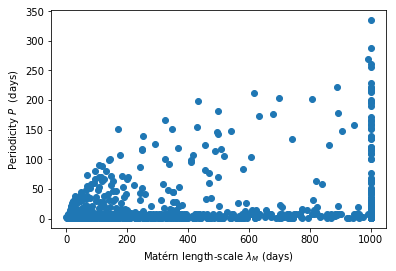

In [14]:
#######################################################################
# Show user similarities in parameter space - before clustering
#######################################################################

if int(extra_type.split('_')[1]) == 1:
    params_names = ['Signal variance', 'Length scale', 'Periodicity', 'White noise']
elif int(extra_type.split('_')[1]) == 3:
    params_names = ['Signal variance', 'Matern length scale', 'Length scale', 'Periodicity', 'White noise']
elif int(extra_type.split('_')[1]) == 4:
    params_names = ['Signal variance', 'Length scale', 'White noise']
elif int(extra_type.split('_')[1]) == 5:
    params_names = ['Signal variance', 'Matern length scale', 'Length scale', 'White noise']
elif int(extra_type.split('_')[1]) == 6:
    params_names = ['Signal variance', 'Length scale', 'Periodicity', 'White noise']
elif int(extra_type.split('_')[1]) == 7:
    params_names = ['Signal variance', 'Matern length scale', 'Length scale', 'Periodicity', 'White noise']
elif int(extra_type.split('_')[1]) == 8:
    params_names = ['Signal variance', 'Length scale', 'White noise']
elif int(extra_type.split('_')[1]) == 9:
    params_names = ['Signal variance', 'Matern length scale', 'Length scale', 'White noise']
else:
    print "err"
    
# params_names = params_names + ['MSD']
# params_names = ['Periodicity', 'MSD WD', 'MSD WE']
# params_names = ['Periodicity', 'STEPS WD', 'STEPS WE', 'MSD WD', 'MSD WE']
# params_names = params_names[:-1]
# params_names = ['Periodicity', 'MSD']
# params_names = ['Signal variance', 'Matern length scale', 'Periodicity']
# params_names = ['Matern length scale', 'Length scale', 'Periodicity']
params_names = [u'Matérn length-scale $\lambda_M$ (days)', 'Periodicity $P$  (days)']

# %matplotlib notebook
# for tx, ty in [[4, 7], [5,8], [6,9], [2, 4], [2, 5], [2, 6], [1,2], [2,0], [0,3], [2,3], [1,3], [0,1]]:
# X[0,1]
Nf = len(params_names) # number of features used in clustering
for tx in range(0, Nf-1):
    for ty in range(tx+1, Nf):
        plt.figure(figsize=(6,4))
        plt.scatter(X[:,tx], X[:,ty])
        plt.xlabel(params_names[tx])
        plt.ylabel(params_names[ty])
#         plt.yscale('log')
#         plt.xscale('log')
    #     plt.xlim(0,15)
        plt.show()

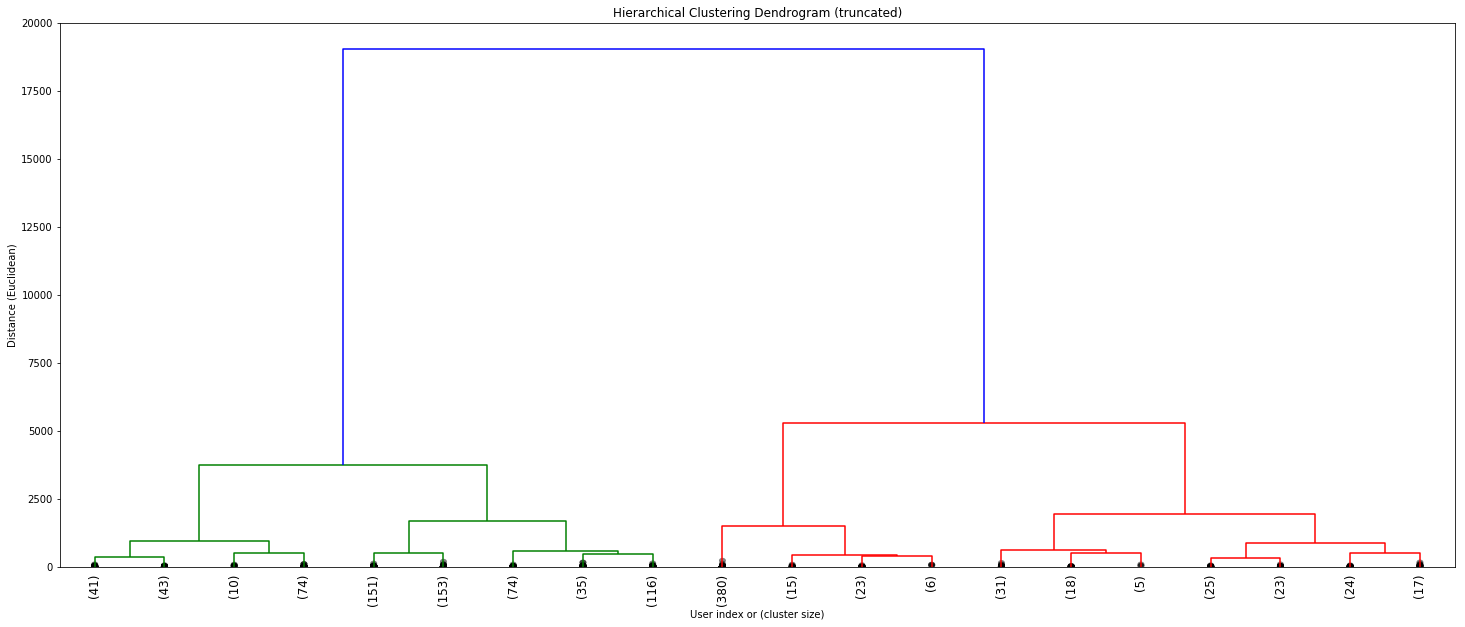

In [4]:
###########################################################
# After data are loaded, cluster it, get linkage matrix
###########################################################

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# generate the linkage matrix
# USING: Ward variance minimization algorithm.
Z = linkage(X, 'ward') # metric='euclidean'

###########################################################
# Plot dendrogram
###########################################################

max_d = 7500 # cutoff line & color threshold
last_p = 20# show only the last p merged clusters

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('User index or (cluster size)')
plt.ylabel('Distance (Euclidean)')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=last_p,               # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    color_threshold=max_d,
)
# plt.axhline(y=max_d, c='k') # show cutoff
plt.show()

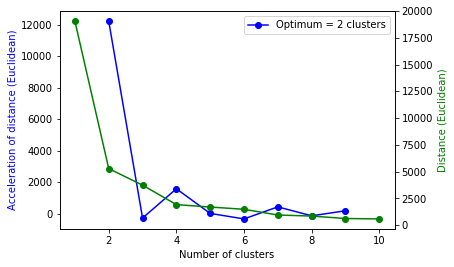

Elbow method: acceleration of distance growth & distance growth are shown
Best #clusters: 2


In [5]:
###########################################################
# Automated selection of #clusters
###########################################################

###########################################################
# 1.) Inconsistency Method - the inconsistency values heavily depend on the depth of the tree you calculate the averages over
# from scipy.cluster.hierarchy import inconsistent
# depth = 5
# incons = inconsistent(Z, depth)
# incons[-10:]

###########################################################
# 2.) Elbow Method - tries to find the clustering step where the acceleration of distance growth is the biggest
# this method will never be able to tell you that all your data is in one single cluster only
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(idxs[:-2] + 1, acceleration_rev, 'bo-', label='Optimum = '+str(acceleration_rev.argmax() + 2) + ' clusters') 
#label='acceleration of distance growth')
ax1.set_ylabel('Acceleration of distance (Euclidean)', color='b')
ax1.set_xlabel('Number of clusters')
ax2.plot(idxs, last_rev, 'go-') #label='distance growth')
ax2.set_ylabel('Distance (Euclidean)', color='g')
ax1.legend()
plt.show()

print "Elbow method: acceleration of distance growth & distance growth are shown"
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print "Best #clusters:", k

In [6]:
###########################################################
# Get cluster labellings - SET #CLUSTERS
###########################################################

from scipy.cluster.hierarchy import fcluster
# max_d = 50
# clustering = fcluster(Z, max_d, criterion='distance')
# OR 
k=2
clustering = fcluster(Z, k, criterion='maxclust')
print k

# Silhouette score
from sklearn.metrics import silhouette_score
print "SS:\n",silhouette_score(X, clustering, metric='euclidean')

2
SS:
0.765082580436


Refined centers of 2 clusters and params of several users from the cluster

Cluster 1 :	size:  697 	  [250 639] 
[ 143.8811197    11.56137505]

[['170.605310125' '2.53791810338']
 ['23.6747607272' '1.16524110088']] 

Cluster 2 :	size:  567 	  [421 488] 
[ 905.84769344   24.86976891]

[['1000.0' '1.16655237492']
 ['1000.0' '45.5174021012']] 



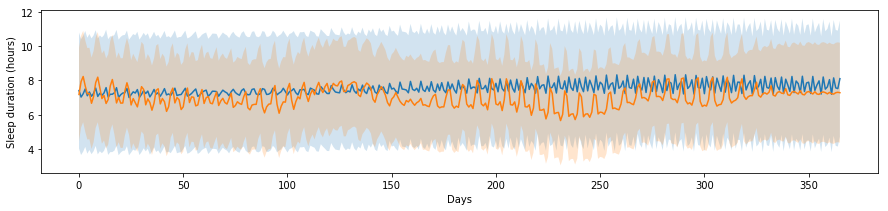

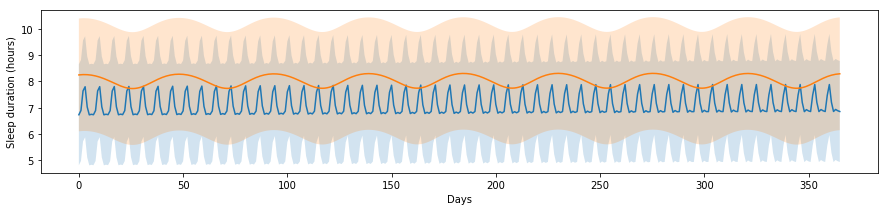

In [7]:
#########################################################################################
# REFINED CENTERS - INTERPRETATION of NON-ORTHOGONAL MEASURES, calculate mean trajectories
#########################################################################################

# Rescale back:
# X = scaler.inverse_transform(X)

GLOBAL_MEAN_SD = 7.26

print "Refined centers of", k, "clusters and params of several users from the cluster\n"
refined_centers = []
yeardays = np.arange(366)
mean_traj_m = np.zeros((k, 366)) # means of mean trajectories for each cluster
mean_traj_s = np.zeros((k, 366)) # stds of mean trajectories for each cluster

for i in range(1,k+1):
    di = X[np.where(clustering == i)[0]]       # datapoints of cluster i
    UIDs_i = y[np.where(clustering == i)[0]]   # UIDs of cluster i
    
    indices_to_show = np.random.randint(0,len(di), 2) # To show some users from each cluster
#     if i == 1: # for 1_1266
#         indices_to_show = [234, 357]
#     else:
#         indices_to_show = [12, 185]

    print "Cluster", i,":\tsize: ", len(di), "\t ", indices_to_show, "\n", np.mean(di, axis=0)
    print "\n", di[indices_to_show].astype('str'), "\n"
    refined_centers.append( np.mean(di, axis=0) )
    
    plt.figure(figsize=(15, 3))
    for UID in UIDs_i: # iterate over users in this cluster
        
        # Extract UID data: predictions
        means = np.load('./../Dataset/Params/clean_' + t + extra_type + '/' + UID + '.npz')['pred_mean']
        stds =  np.load('./../Dataset/Params/clean_' + t + extra_type + '/' + UID + '.npz')['pred_std']
        mean_traj_m[i-1] += means
#         mean_traj_s[i-1] += stds
        mean_traj_s[i-1] += stds*stds
    
        if UID in UIDs_i[indices_to_show]:
            # Plot predictions and org data for some users
            dd = np.load('./../Dataset/clean_' + t + '/' + UID + '.npz')['xy']
            XX = dd[:,0]
            yy = dd[:,1]
            plt.fill_between(yeardays, GLOBAL_MEAN_SD + means-2*stds, GLOBAL_MEAN_SD + means+2*stds, alpha=.2)
            plt.plot(yeardays, GLOBAL_MEAN_SD + means)
            plt.xlabel('Days')
            plt.ylabel('Sleep duration (hours)')
#             plt.scatter(XX, yy, color='black')
            
    mean_traj_m[i-1] = mean_traj_m[i-1] / len(UIDs_i)
#     mean_traj_s[i-1] = mean_traj_s[i-1] / len(UIDs_i)
    mean_traj_s[i-1] = np.sqrt(mean_traj_s[i-1]) / len(UIDs_i)
        
refined_centers = np.array(refined_centers)
plt.show()


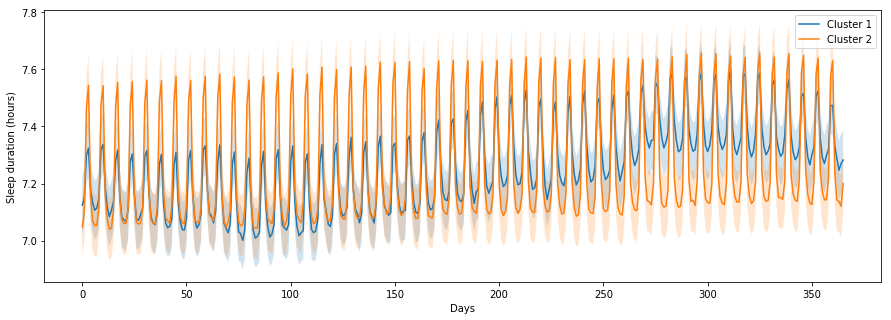

In [8]:
###########################################################
# Show mean trajectories for each cluster
###########################################################

plt.figure(figsize=(15, 5))
for i in range(k):
    plt.fill_between(yeardays, GLOBAL_MEAN_SD + mean_traj_m[i]-2*mean_traj_s[i], 
                     GLOBAL_MEAN_SD + mean_traj_m[i]+2*mean_traj_s[i], alpha=.2)
    plt.plot(yeardays, GLOBAL_MEAN_SD + mean_traj_m[i], label='Cluster ' + str(i+1))
plt.xlabel('Days')
plt.ylabel('Sleep duration (hours)')
plt.legend()
plt.show()

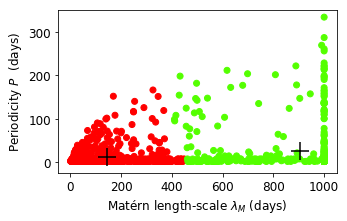

In [19]:
###########################################################
# Show user similarities in parameter space - after clustering
###########################################################
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
# %matplotlib notebook
for tx in range(0, Nf-1):
    for ty in range(tx+1, Nf):
        plt.figure(figsize=(5,3))
        plt.scatter(X[:,tx], X[:,ty], c=clustering, cmap='prism')
        plt.scatter(refined_centers[:,tx], refined_centers[:,ty], marker='+', s=300, c='black')
        plt.xlabel(params_names[tx])
        plt.ylabel(params_names[ty])
        plt.show()

In [81]:
###########################################################
# Save clustering as [UID, clusterID] pairs, in string format
###########################################################
# if cluster_log_params:
#     extra_type = extra_type + '_logp'
np.savez('./../Dataset/Clustering/clean_' + t + extra_type + '.npz', c=np.concatenate(([y],[clustering.astype('str')]), axis=0).T)